# ***TO ACCESS FILES IN DRIVE BY COLAB***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***LIBRARIES***

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import random
import os
import numpy as np

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model,img_to_array,load_img

# ***READING IMAGE FROM DATA***

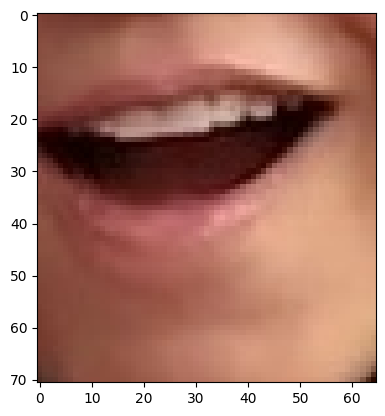

In [ ]:
img=image.load_img("/content/drive/MyDrive/train/mouth open/1.jpg")
plt.imshow(img)


# ***FIND 3D MATRIX***

In [ ]:
cv2.imread("/content/drive/MyDrive/train/mouth open/1.jpg")

array([[[ 53,  64, 124],
        [ 51,  62, 122],
        [ 49,  61, 119],
        ...,
        [ 67,  81, 153],
        [ 71,  85, 157],
        [ 76,  91, 164]],

       [[ 55,  66, 126],
        [ 52,  63, 123],
        [ 50,  62, 120],
        ...,
        [ 58,  73, 145],
        [ 63,  78, 150],
        [ 71,  86, 159]],

       [[ 57,  69, 127],
        [ 55,  67, 125],
        [ 53,  65, 123],
        ...,
        [ 48,  67, 135],
        [ 56,  75, 143],
        [ 67,  82, 154]],

       ...,

       [[ 43,  53,  93],
        [ 48,  60, 102],
        [ 50,  61, 105],
        ...,
        [108, 133, 177],
        [ 96, 120, 162],
        [ 72,  92, 133]],

       [[ 40,  49,  86],
        [ 47,  59,  95],
        [ 50,  60, 100],
        ...,
        [101, 123, 165],
        [ 78,  99, 137],
        [ 29,  45,  82]],

       [[ 34,  44,  74],
        [ 43,  54,  86],
        [ 46,  55,  92],
        ...,
        [ 67,  87, 128],
        [ 27,  45,  82],
        [  0,  10,  42]]

# ***SHAPE OF IMAGE***

In [ ]:
cv2.imread("/content/drive/MyDrive/train/mouth open/1.jpg").shape

(71, 65, 3)

# ***PREPROCESSING DATA***

In [ ]:
image_size=48
batch_size=64
datagen_train=ImageDataGenerator(1/255)
train_generator=datagen_train.flow_from_directory("/content/drive/MyDrive/train",target_size=(image_size,image_size),
                                                  color_mode="rgb",batch_size=batch_size,
                                                 class_mode="binary",shuffle=True)

datagen_test=ImageDataGenerator(1/255)
validation_generator=datagen_test.flow_from_directory("/content/drive/MyDrive/test",target_size=(image_size,image_size),
                                                  color_mode="rgb",batch_size=batch_size,
                                                 class_mode="binary",shuffle=True)

Found 3970 images belonging to 2 classes.
Found 1149 images belonging to 2 classes.


# ***TO FIND THE CLASSIFICATION 0s AND 1s***

In [ ]:
train_generator.class_indices

{'mouth closed': 0, 'mouth open': 1}

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# ***MODEL CREATION***

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())


model.add(Conv2D(64,(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())


model.add(Conv2D(128,(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


# ***COMPILING MODEL***

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=Adam(learning_rate=0.0005),metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 23, 23, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                        

# ***INITIALIZE THE MODEL***

In [ ]:
epoch=10
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint=ModelCheckpoint("model_mouth.h5",monitor='val_accuracy',
                           save_weights_only=False,save_best_only=True,mode='max',verbose=1)
callbacks=[checkpoint]

# ***TRAINING THE MODEL***

In [ ]:
model_fit=model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=epoch,
                    validation_data=validation_generator,
                    callbacks=callbacks)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
61/62 [============================>.] - ETA: 9s - loss: 0.2133 - accuracy: 0.9226 
Epoch 1: val_accuracy improved from -inf to 0.59099, saving model to model_mouth.h5
62/62 [==============================] - 821s 13s/step - loss: 0.2136 - accuracy: 0.9224 - val_loss: 0.7473 - val_accuracy: 0.5910


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9649
Epoch 2: val_accuracy improved from 0.59099 to 0.94669, saving model to model_mouth.h5
62/62 [==============================] - 40s 643ms/step - loss: 0.1039 - accuracy: 0.9649 - val_loss: 0.1620 - val_accuracy: 0.9467
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9816
Epoch 3: val_accuracy did not improve from 0.94669
62/62 [==============================] - 43s 698ms/step - loss: 0.0567 - accuracy: 0.9816 - val_loss: 0.1755 - val_accuracy: 0.9265
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9834
Epoch 4: val_accuracy improved from 0.94669 to 0.95404, saving model to model_mouth.h5
62/62 [==============================] - 40s 651ms/step - loss: 0.0506 - accuracy: 0.9834 - val_loss: 0.1262 - val_accuracy: 0.9540
Epoch 5/10
62/62 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9892
Epo

# ***EVALUATING THE MODEL***

In [ ]:
model.evaluate(validation_generator)

18/18 [==============================] - 5s 291ms/step - loss: 0.1965 - accuracy: 0.9417


[0.19653290510177612, 0.9416884183883667]

# ***PLOTTING LOSS***

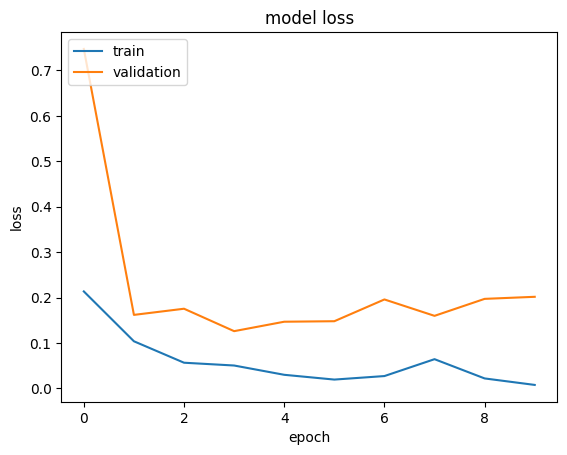

In [ ]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.legend(['train','validation'],loc="upper left")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# ***PLOTTING ACCURACY***

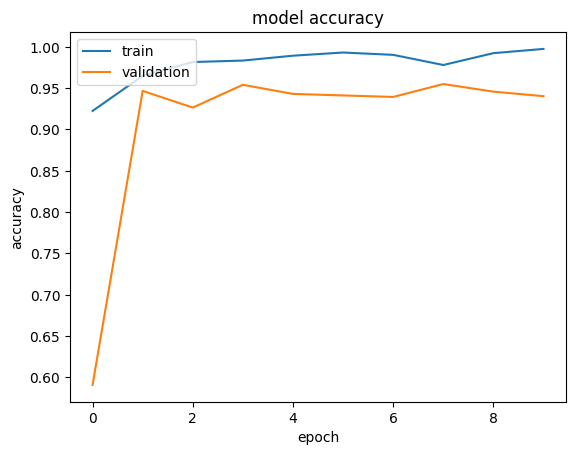

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train','validation'],loc="upper left")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

# ***TESTING THE MODEL***

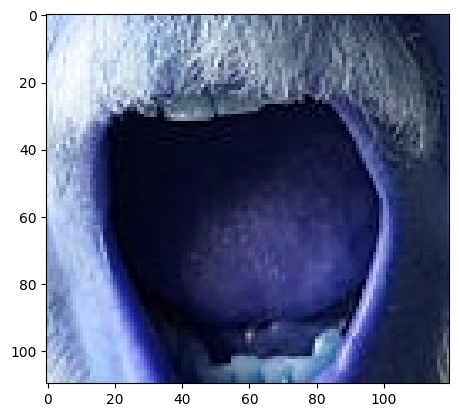

1/1 [==============================] - 0s 25ms/step
Mouth open


In [ ]:
idx2=cv2.imread("/content/drive/MyDrive/test/mouth open/2075.jpg")
plt.imshow(idx2)
plt.show()

img=image.load_img('/content/drive/MyDrive/test/mouth open/2075.jpg',target_size=(48,48,3))
img_array=img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
prediction=model.predict(img_array)

if prediction[0][0] > 0.5:
  print("Mouth open")
else:
  print("Mouth close")

# ***SAVING THE MODEL***

In [ ]:
model_json=model.to_json()
with open("model_a.json","w")as json_file:
  json_file.write(model_json)